In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
import xgboost as xgb
from sklearn import metrics
import pickle
import pandas as pd
from keras.applications.vgg16 import VGG16
from keras.models import Model

In [2]:
image_directory = "../dataset/256_patches_splitted/train/images"
mask_directory = "../dataset/256_patches_splitted/train/masks"
image_dataset = []
for directory_path in os.listdir(image_directory):
    image = cv2.imread(image_directory + "/" + directory_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_dataset.append(image)
image_dataset = np.array(image_dataset)
mask_dataset = []
for directory_path in os.listdir(mask_directory):
    mask = cv2.imread(mask_directory + "/" + directory_path)
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    mask_dataset.append(mask)
mask_dataset = np.array(mask_dataset)
print(mask_dataset.shape)
print(image_dataset.shape)

(96, 256, 256)
(96, 256, 256, 3)


In [3]:
image_directory2 = "../dataset/256_patches_splitted/val/images"
mask_directory2 = "../dataset/256_patches_splitted/val/masks"
image_dataset2 = []
for directory_path in os.listdir(image_directory2):
    image = cv2.imread(image_directory2 + "/" + directory_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_dataset2.append(image)
image_dataset2 = np.array(image_dataset2)
mask_dataset2 = []
for directory_path in os.listdir(mask_directory2):
    mask = cv2.imread(mask_directory2 + "/" + directory_path)
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    mask_dataset2.append(mask)
mask_dataset2 = np.array(mask_dataset2)
print(mask_dataset2.shape)
print(image_dataset2.shape)

(36, 256, 256)
(36, 256, 256, 3)


In [4]:
image_directory3 = "../dataset/256_patches_splitted/test/images"
mask_directory3 = "../dataset/256_patches_splitted/test/masks"
image_dataset3 = []
for directory_path in os.listdir(image_directory3):
    image = cv2.imread(image_directory3 + "/" + directory_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_dataset3.append(image)
image_dataset3 = np.array(image_dataset3)
mask_dataset3 = []
for directory_path in os.listdir(mask_directory3):
    mask = cv2.imread(mask_directory3 + "/" + directory_path)
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    mask_dataset3.append(mask)
mask_dataset3 = np.array(mask_dataset3)
print(mask_dataset3.shape)
print(image_dataset3.shape)

(24, 256, 256)
(24, 256, 256, 3)


In [5]:
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
for layer in VGG_model.layers:
    layer.trainable = False
VGG_model.summary()
new_model = Model(inputs=VGG_model.input, outputs=VGG_model.get_layer('block1_conv2').output)

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [6]:
feature_extractor = new_model.predict(image_dataset)
print(feature_extractor.shape)
features = feature_extractor.reshape(-1, feature_extractor.shape[3])
print(features.shape)

3/3 [==============================] - 13s 5s/step
(96, 256, 256, 64)
(6291456, 64)


In [7]:
feature_extractor2 = new_model.predict(image_dataset2)
print(feature_extractor2.shape)
features2 = feature_extractor2.reshape(-1, feature_extractor2.shape[3])
print(features2.shape)

2/2 [==============================] - 1s 164ms/step
(36, 256, 256, 64)
(2359296, 64)


In [8]:
feature_extractor3 = new_model.predict(image_dataset3)
print(feature_extractor3.shape)
features3 = feature_extractor3.reshape(-1, feature_extractor3.shape[3])
print(features3.shape)

1/1 [==============================] - 1s 680ms/step
(24, 256, 256, 64)
(1572864, 64)


In [9]:
X_train = features
Y_train = mask_dataset.reshape(-1)
dataset = pd.DataFrame(X_train)
dataset["Label"] = Y_train
# dataset = dataset[dataset["Label"] != 0]
X_train = dataset.drop(labels=["Label"], axis=1)
Y_train = dataset['Label']
print(dataset["Label"].unique())
print(dataset["Label"].value_counts())

[0 1 5 3 6 4 2]
Label
0    3017642
1    1160005
5     687626
3     677589
4     603158
6     102342
2      43094
Name: count, dtype: int64


In [10]:
X_val = features2
Y_val = mask_dataset2.reshape(-1)
dataset2 = pd.DataFrame(X_val)
dataset2["Label"] = Y_val
# dataset2 = dataset2[dataset2["Label"] != 0]
X_val = dataset2.drop(labels=["Label"], axis=1)
Y_val = dataset2['Label']
print(dataset2["Label"].unique())
print(dataset2["Label"].value_counts())

[0 1 5 3 4 6 2]
Label
0    1083446
1     445730
5     280751
4     259676
3     249826
6      33278
2       6589
Name: count, dtype: int64


In [11]:
X_test = features3
Y_test = mask_dataset3.reshape(-1)
dataset3 = pd.DataFrame(X_test)
dataset3["Label"] = Y_test
# dataset3 = dataset3[dataset3["Label"] != 0]
X_test = dataset3.drop(labels=["Label"], axis=1)
Y_test = dataset3['Label']
print(dataset3["Label"].unique())
print(dataset3["Label"].value_counts())

[0 1 5 3 4 6 2]
Label
0    681114
1    310782
5    182122
4    171655
3    169015
6     54442
2      3734
Name: count, dtype: int64


In [12]:
start = time.time()
model = xgb.XGBClassifier()
print("Start training...")
model.fit(X_train, Y_train)
end = time.time()
print("Time execution : ", end - start)
pickle.dump(model, open('../models/XGB_2', 'wb'))
loaded_model = pickle.load(open('../models/XGB_2', 'rb'))

Start training...
Time execution :  534.4366047382355


In [13]:
from sklearn.metrics import mean_absolute_error

pred_val = loaded_model.predict(X_val)
pred_train = loaded_model.predict(X_train)
val_accuracy = metrics.accuracy_score(Y_val, pred_val)
train_accuracy = metrics.accuracy_score(Y_train, pred_train)
print("Validation accuracy=", val_accuracy)
print("Train accuracy =", train_accuracy)
val_error = mean_absolute_error(pred_val, Y_val)
train_error = mean_absolute_error(pred_train, Y_train)
print("Validation error=", val_error)
print("Train error =", train_error)

Validation accuracy= 0.7410786946614584
Train accuracy = 0.7626458803812662
Validation error= 0.871903313530816
Train error = 0.7859900792439779


Balanced accuracy = 0.5969219670321824
Accuracy = 0.6948795318603516
Mean IOU = 0.5365620986122449
              precision    recall  f1-score   support

           0       0.70      0.71      0.71    681114
           1       0.79      0.84      0.81    310782
           2       0.51      0.32      0.39      3734
           3       0.55      0.67      0.60    169015
           4       0.58      0.48      0.53    171655
           5       0.74      0.68      0.71    182122
           6       0.73      0.47      0.58     54442

    accuracy                           0.69   1572864
   macro avg       0.66      0.60      0.62   1572864
weighted avg       0.70      0.69      0.69   1572864


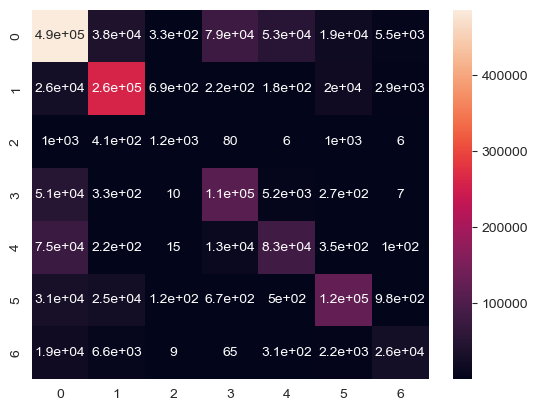

In [14]:
import seaborn as sns

# Make predictions on the test set
prediction_test = loaded_model.predict(X_test)
# Calculate and print the evaluations
balanced_accuracy = metrics.balanced_accuracy_score(Y_test, prediction_test)
accuracy = metrics.accuracy_score(Y_test, prediction_test)
iou = metrics.jaccard_score(Y_test, prediction_test, average='weighted')
print("Balanced accuracy =", balanced_accuracy)
print("Accuracy =", accuracy)
print("Mean IOU =", iou)
sns.heatmap(metrics.confusion_matrix(Y_test, prediction_test, labels=[0, 1, 2, 3, 4, 5, 6]), annot=True)
print(metrics.classification_report(Y_test, prediction_test, labels=[0, 1, 2, 3, 4, 5, 6]))

In [15]:
image_directory3 = "../dataset/256_patches_splitted/test/images"
for subdir in os.listdir(image_directory3):
    print("Predict image : " + subdir)
    img = cv2.imread(image_directory3 + "/" + subdir)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = np.expand_dims(img, axis=0)
    test = new_model.predict(img)
    test = test.reshape(-1, test.shape[3])
    print(test.shape)
    result = loaded_model.predict(test)
    segmented_result = result.reshape((256, 256, 1))
    segmented_result = cv2.convertScaleAbs(segmented_result)
    cv2.imwrite('../results/XGB_2/' + subdir, segmented_result)

Predict image : image_patch_11.tif
1/1 [==============================] - 0s 93ms/step
(65536, 64)
Predict image : image_patch_17.tif
1/1 [==============================] - 0s 44ms/step
(65536, 64)
Predict image : image_patch_210.tif
1/1 [==============================] - 0s 40ms/step
(65536, 64)
Predict image : image_patch_311.tif
1/1 [==============================] - 0s 38ms/step
(65536, 64)
Predict image : image_patch_34.tif
1/1 [==============================] - 0s 41ms/step
(65536, 64)
Predict image : image_patch_38.tif
1/1 [==============================] - 0s 39ms/step
(65536, 64)
Predict image : image_patch_41.tif
1/1 [==============================] - 0s 39ms/step
(65536, 64)
Predict image : image_patch_410.tif
1/1 [==============================] - 0s 36ms/step
(65536, 64)
Predict image : image_patch_56.tif
1/1 [==============================] - 0s 38ms/step
(65536, 64)
Predict image : image_patch_61.tif
1/1 [==============================] - 0s 45ms/step
(65536, 64)
Predict

[0 1 2 3 4 5]


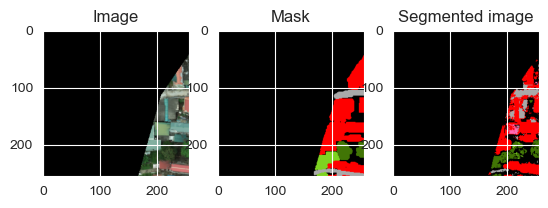

[0 1 2 3 4 5 6]


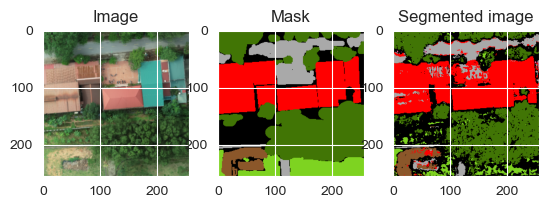

[0 1 2 3 4 5 6]


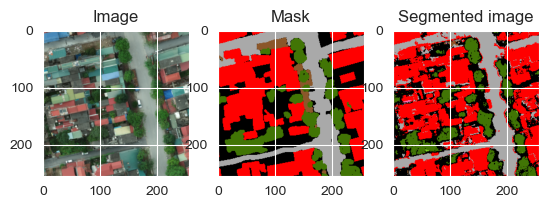

[0 1 2 3 4 5 6]


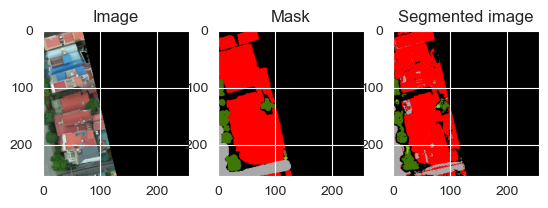

[0 1 2 3 4 5 6]


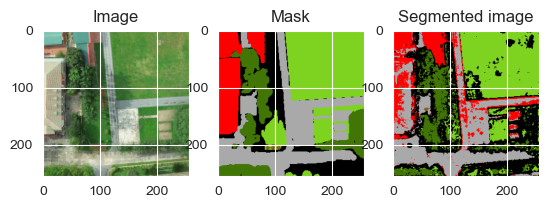

[0 1 2 3 4 5 6]


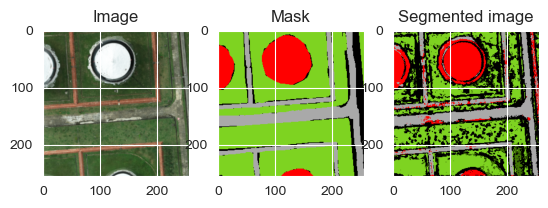

[0 1 2 3 4 5 6]


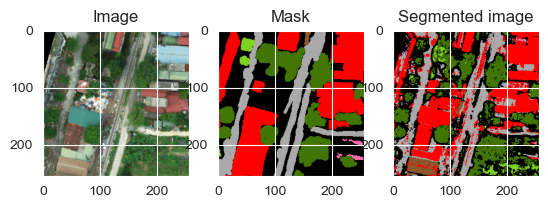

[0 1 2 3 4 5 6]


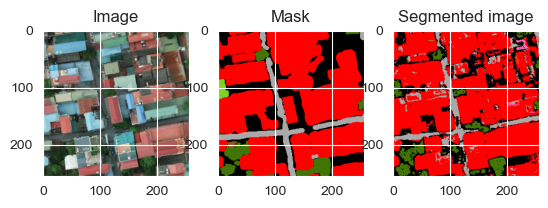

[0 1 2 3 4 5 6]


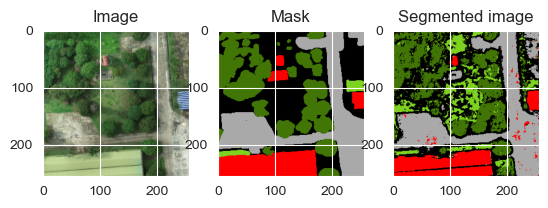

[0 1 2 3 4 5 6]


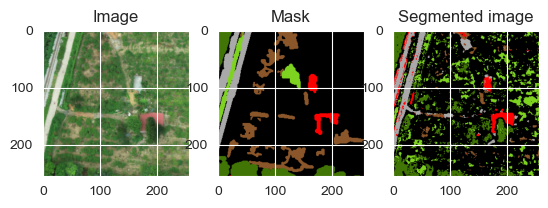

[0 1 2 3 4 5 6]


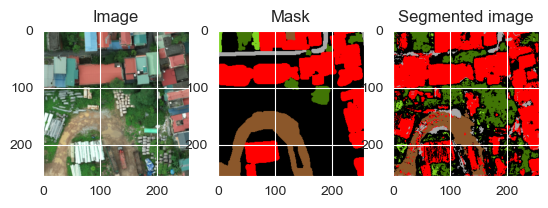

[0 1 2 3 4 5 6]


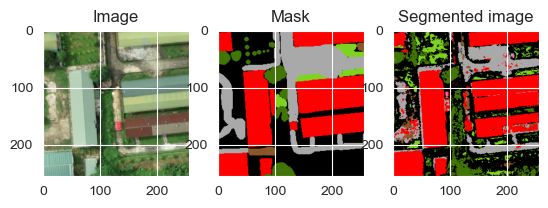

[0 1 2 3 4 5 6]


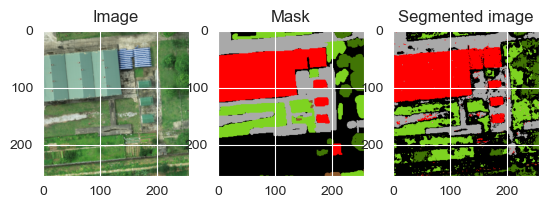

[0 1 2 3 4 5 6]


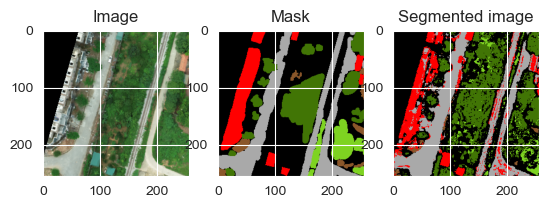

[0 1 2 3 4 5 6]


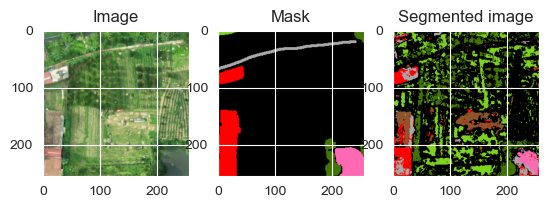

[0 1 2 3 4 5 6]


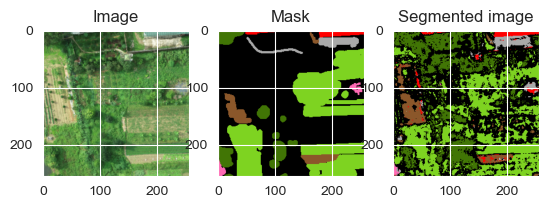

[0 1 2 3 4 5 6]


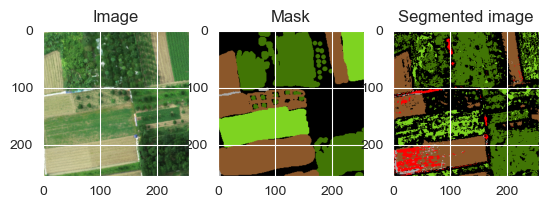

[0 1 2 3 4 5 6]


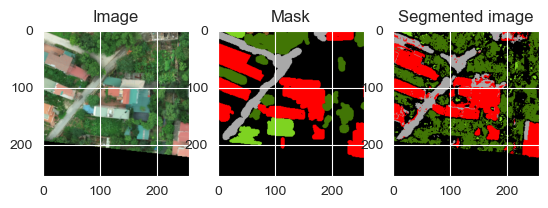

[0 1 2 3 4 5 6]


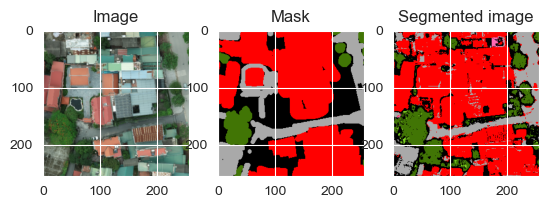

[0 1 2 3 4 5 6]


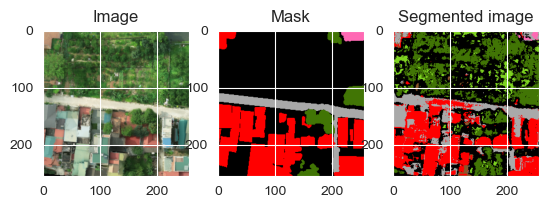

[0 1 3 4 5 6]


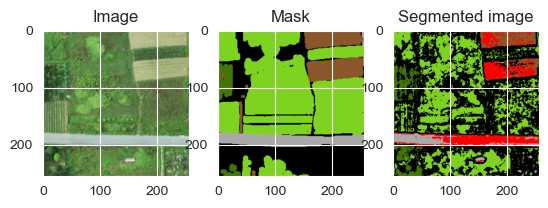

[0 1 2 3 4 5 6]


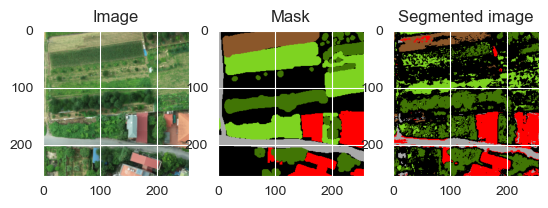

[0 1 3 4 5]


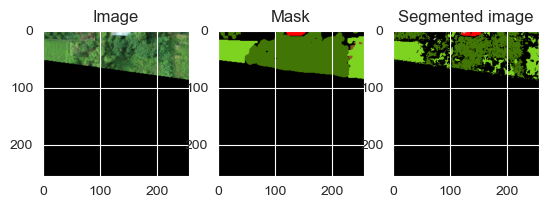

[0 1 2 3 4 5 6]


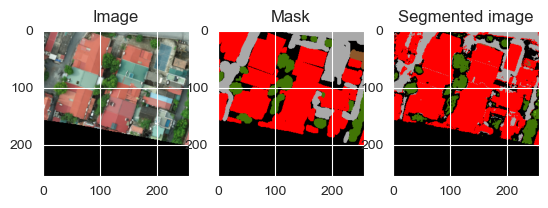

In [16]:
# test_img = cv2.imread("../dataset/256_patches_splitted/train/images/image_patch_15.tif")
# features = feature_extraction(test_img, "image")
# result = loaded_model.predict(features)
# segmented_result = result.reshape((256, 256, 1))
# print("Here  : ", np.unique(segmented_result))
# cv2.imwrite('../results/RF_test_1.tif', segmented_result)
color_map = {
    0: [0, 0, 0],  # Background (unlabeled - black)
    1: [255, 0, 0],  # Class 1 (building - #FF0000)
    2: [255, 105, 180],  # Class 2 (water - #FF69B4 )
    3: [65, 117, 5],  # Class 3 (tree - #417505)
    4: [126, 211, 33],  # Class 4 (grass - #7ED321)
    5: [169, 169, 169],  # Class 5 (road - #A9A9A9)
    6: [139, 87, 42]  # Class 6 (soil - #8B572A)
}
image_directory = "../dataset/256_patches_splitted/test/images"
test_directory = "../dataset/256_patches_splitted/test/masks"
for subdir in os.listdir(test_directory):
    result_dir = "image" + subdir[4:]
    image = cv2.imread(image_directory + "/" + result_dir)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    mask = cv2.imread(test_directory + "/" + subdir)
    result = cv2.imread("../results/XGB_2/" + result_dir, 0)
    print(np.unique(result))
    result = cv2.merge([result, result, result])
    rgb_result = np.zeros(result.shape, dtype=np.uint8)
    for i in range(0, 7):
        rgb_result[np.all(result == [i, i, i], axis=-1)] = color_map[i]
        mask[np.all(mask == [i, i, i], axis=-1)] = color_map[i]
    plt.subplot(1, 3, 1)
    plt.title("Image")
    plt.imshow(image)
    plt.subplot(1, 3, 2)
    plt.title("Mask")
    plt.imshow(mask)
    plt.subplot(1, 3, 3)
    plt.title("Segmented image")
    plt.imshow(rgb_result)
    plt.show()